# Determination of lightning length from light curves

In [102]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 

/storage/experiments/2021/0605_bourka_radosovice 5
Night thunderstorm


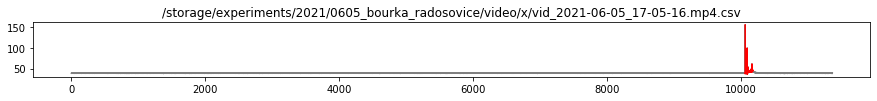

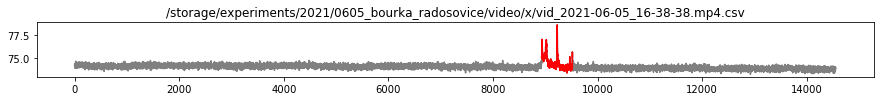

Night thunderstorm


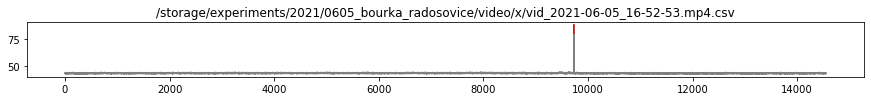

/storage/experiments/2021/0609_bourka_sobeslav 5


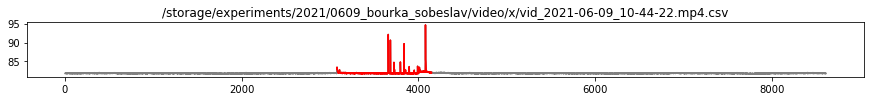

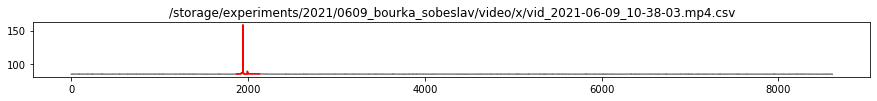

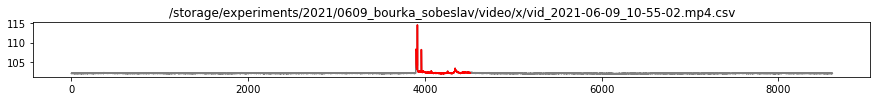

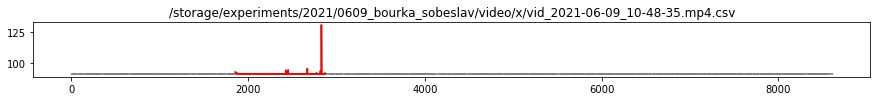

/storage/experiments/2021/0711_bourka_stiavnica 5


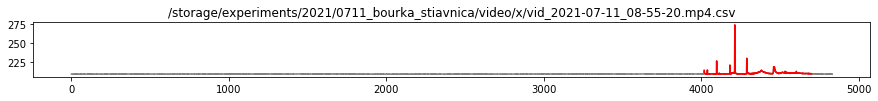

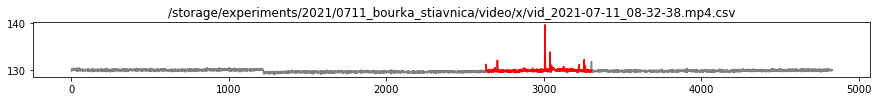

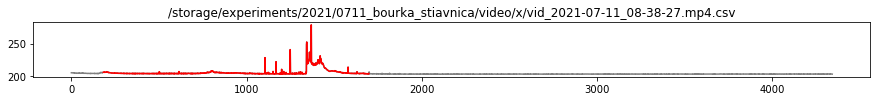

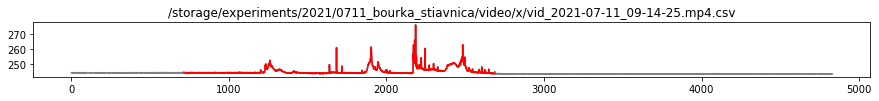

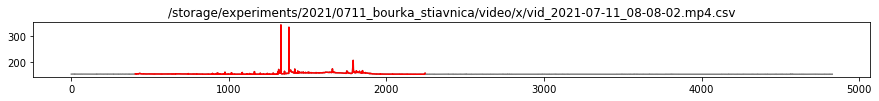

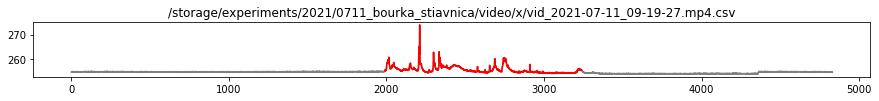

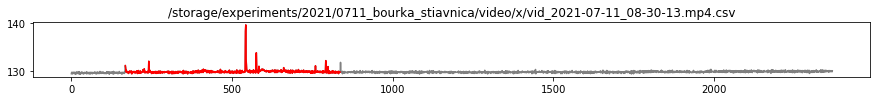

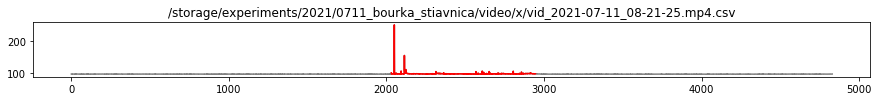

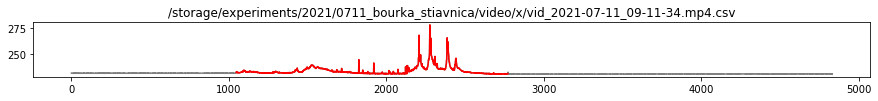

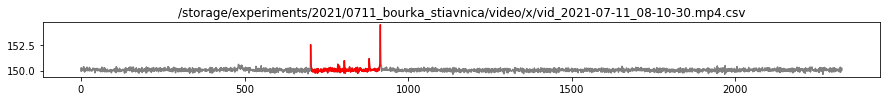

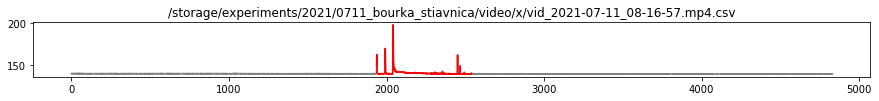

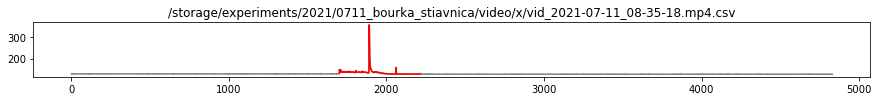

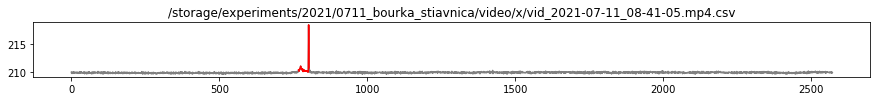

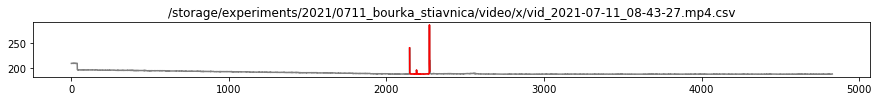

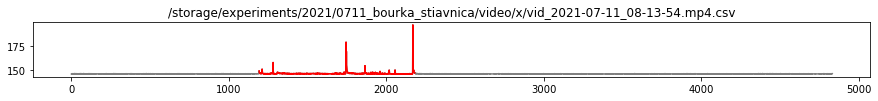

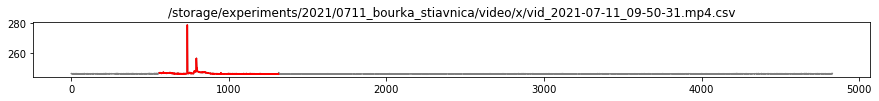

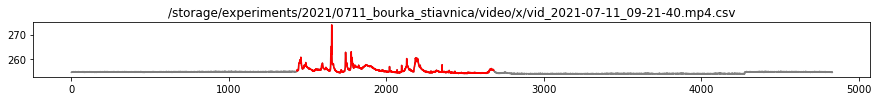

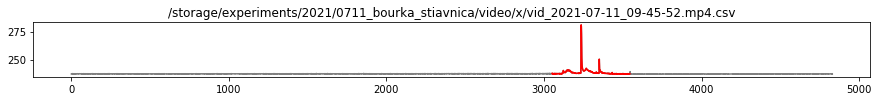

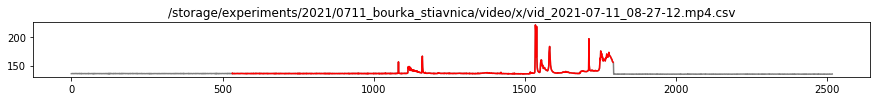

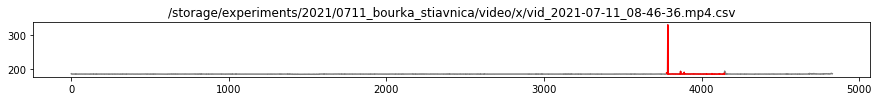

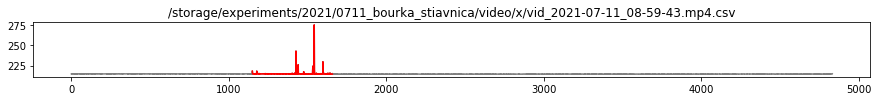

/storage/experiments/2021/0714_bourka_martin 5


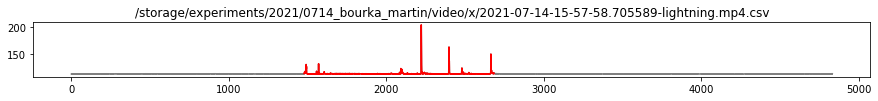

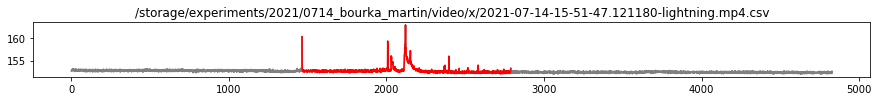

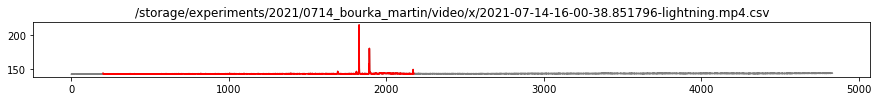

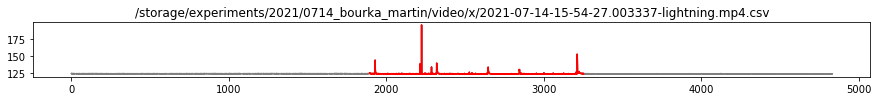

/storage/experiments/2021/0714_bourka_sobeslav 5


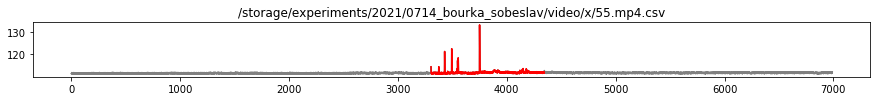

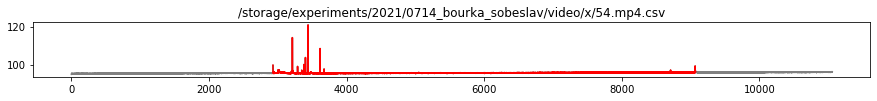

/storage/experiments/2021/0725_bourka_ratmirov 5
Night thunderstorm


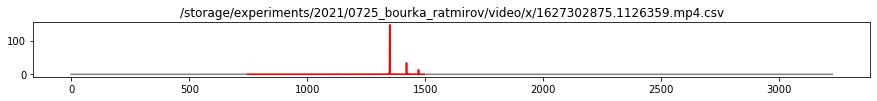

Night thunderstorm


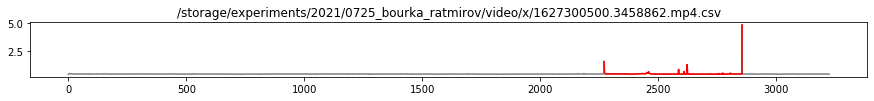

Night thunderstorm


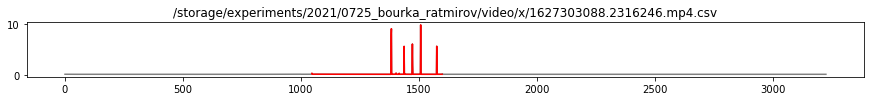

Night thunderstorm


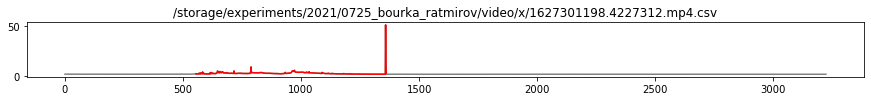

Night thunderstorm


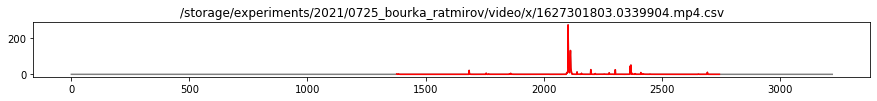

Night thunderstorm


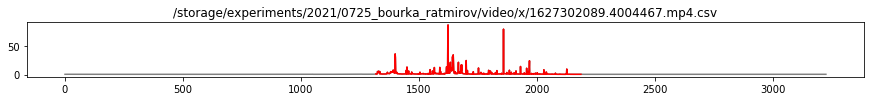

Night thunderstorm


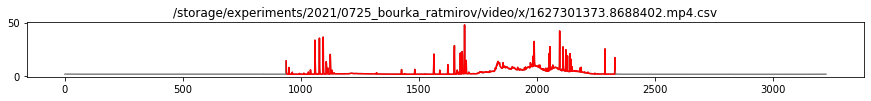

Night thunderstorm


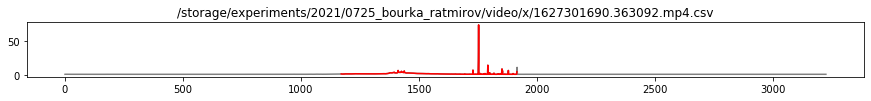

Night thunderstorm


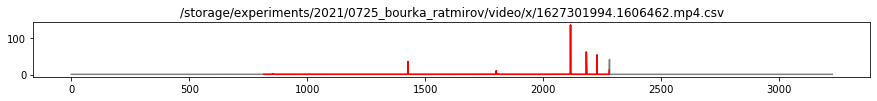

Night thunderstorm


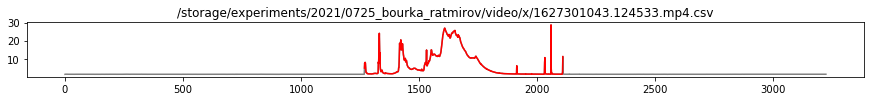

Night thunderstorm


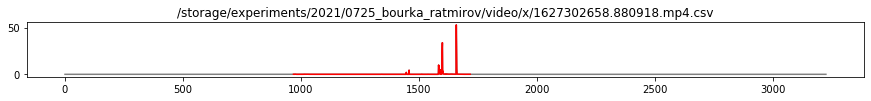

Night thunderstorm


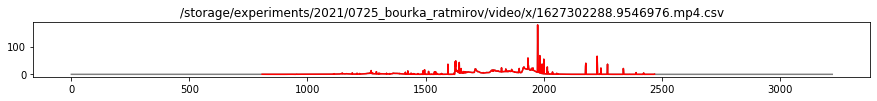

Night thunderstorm


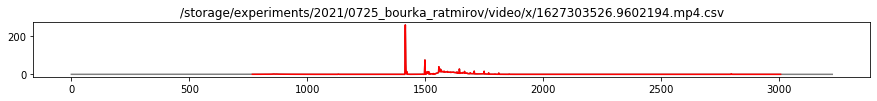

Night thunderstorm


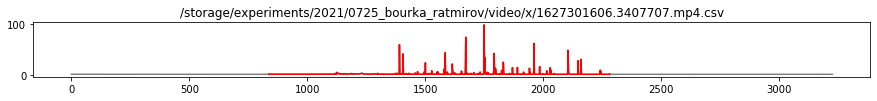

Night thunderstorm


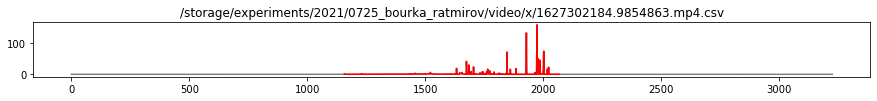

Night thunderstorm


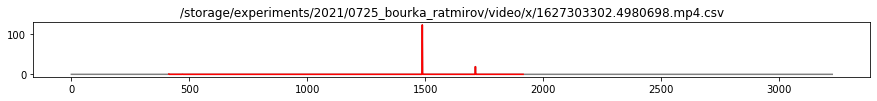

Night thunderstorm


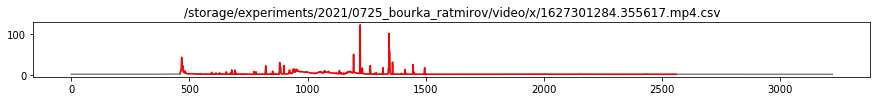

Night thunderstorm


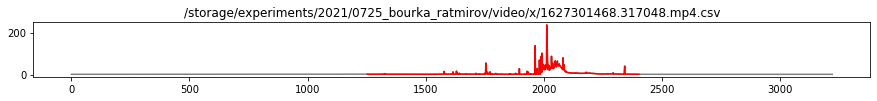

Night thunderstorm


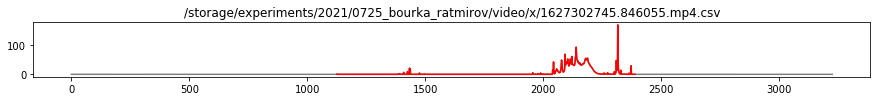

/storage/experiments/2021/0726_bourka_zabori 5


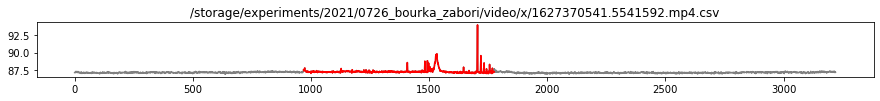

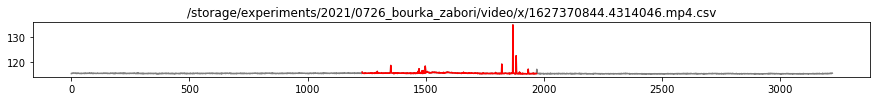

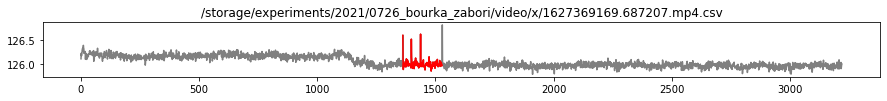

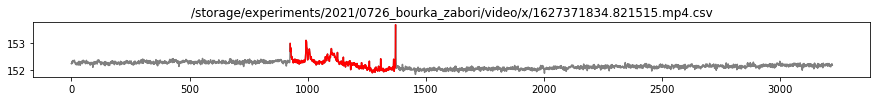

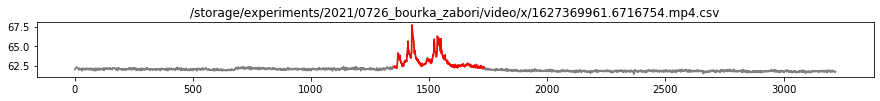

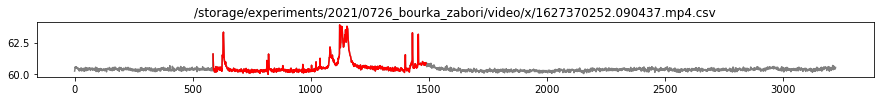

/storage/experiments/2021/0803_bourka_votice 5
/storage/experiments/2021/0807_bourka_sobeslav 5


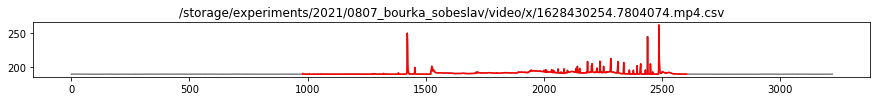

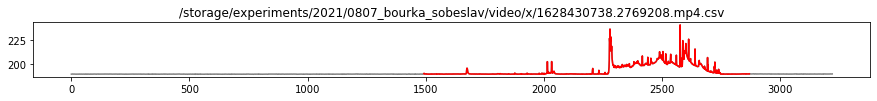

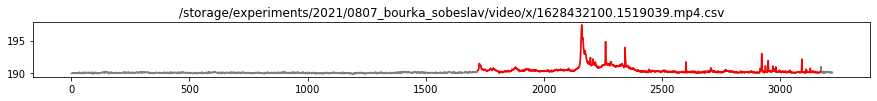

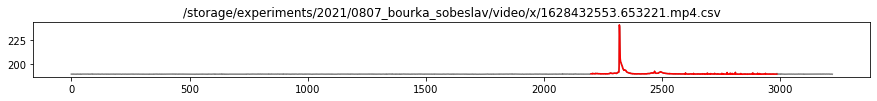

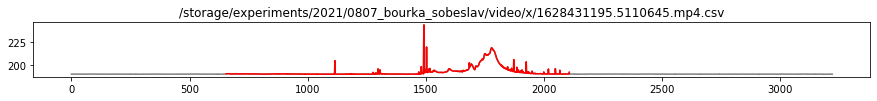

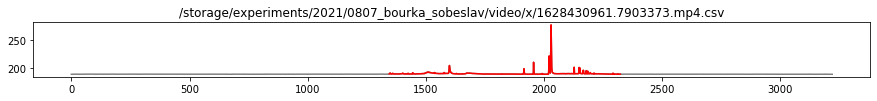

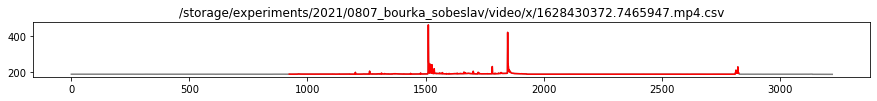

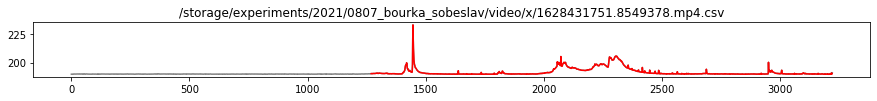

Night thunderstorm


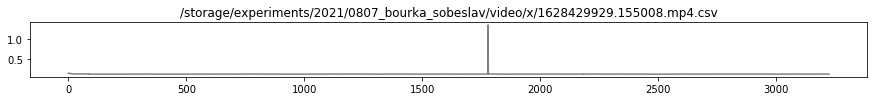

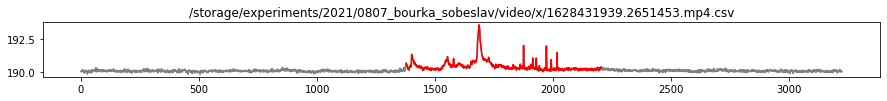

Night thunderstorm


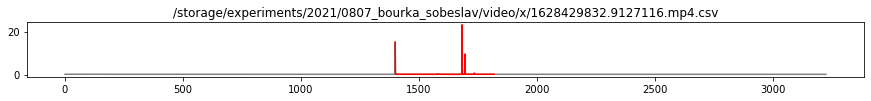

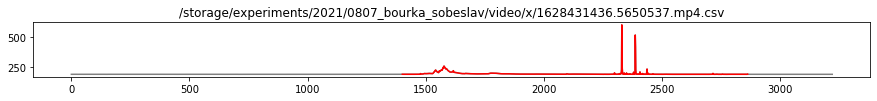

Night thunderstorm


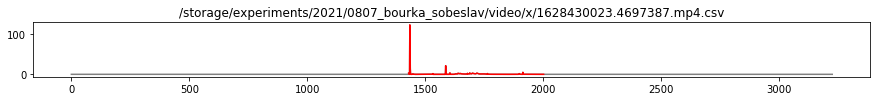

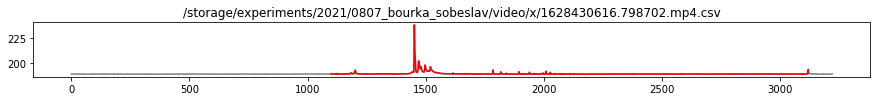

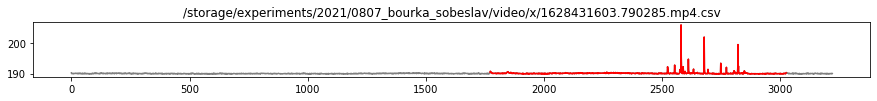

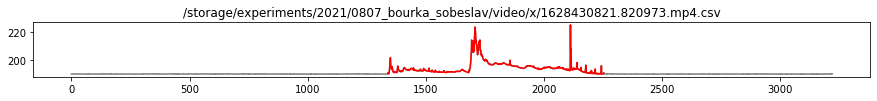

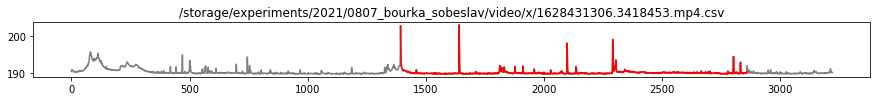

Night thunderstorm


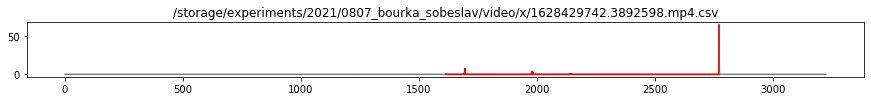

Night thunderstorm


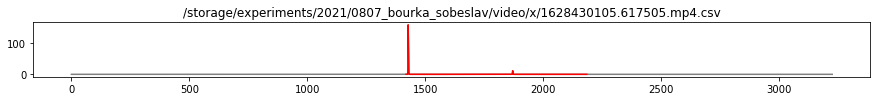

/storage/experiments/2021/0815_bourka_veseli_auto1 5


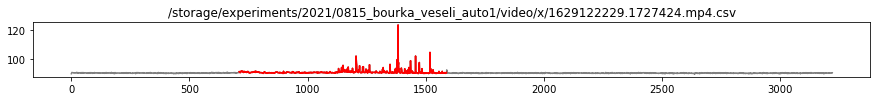

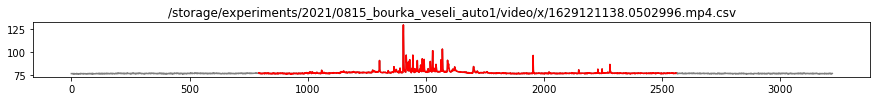

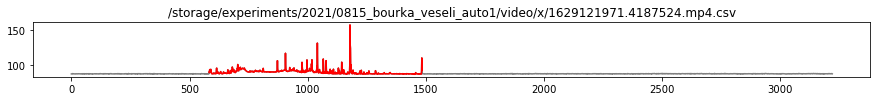

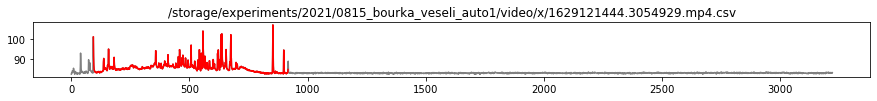

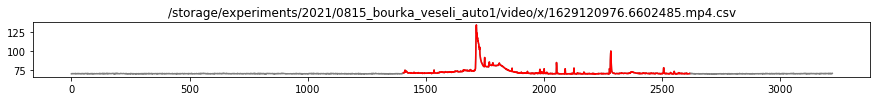

/storage/experiments/2021/0815_bourka_veseli_auto0 5
Night thunderstorm


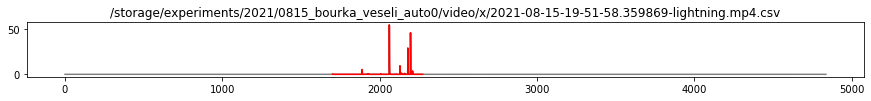

Night thunderstorm


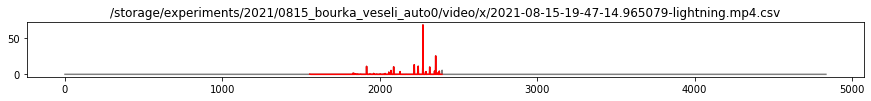

Night thunderstorm


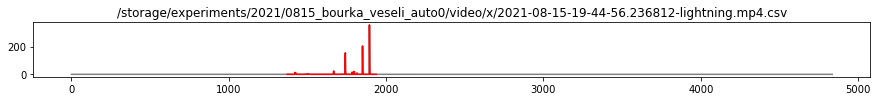

Night thunderstorm


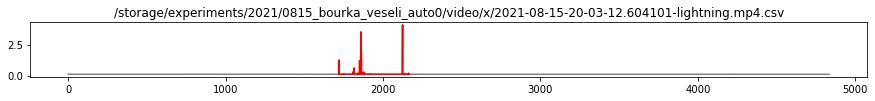

Night thunderstorm


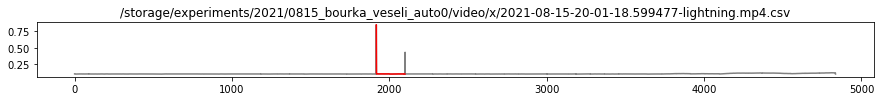

Night thunderstorm


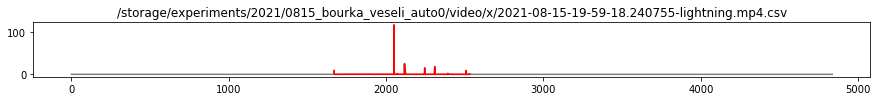

Night thunderstorm


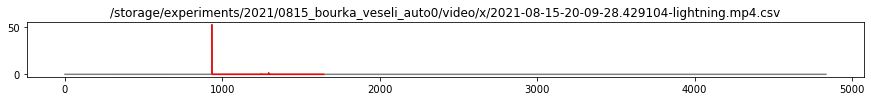

Night thunderstorm


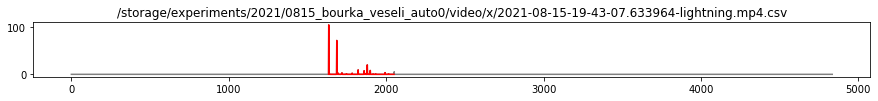

Night thunderstorm


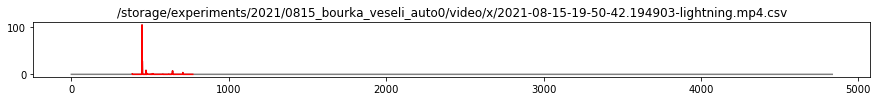

Night thunderstorm


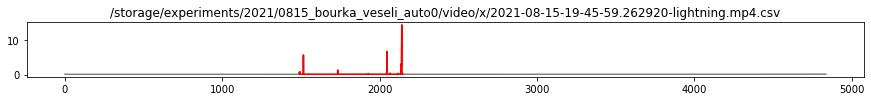

Night thunderstorm


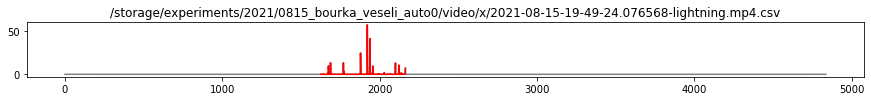

Night thunderstorm


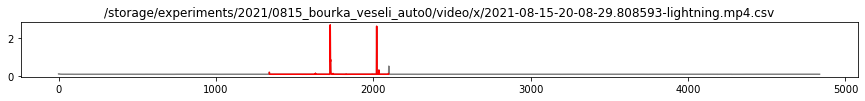

Night thunderstorm


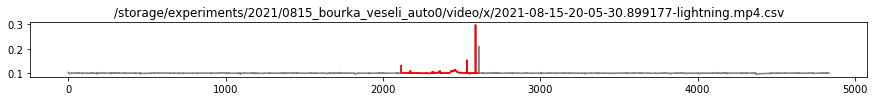

Night thunderstorm


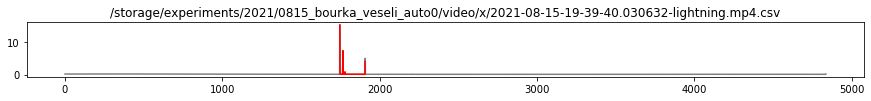

Night thunderstorm


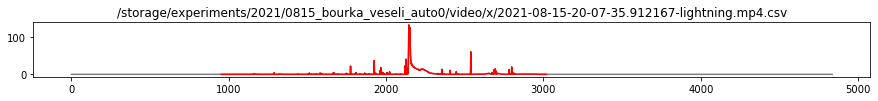

Night thunderstorm


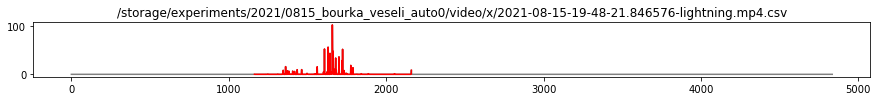

Night thunderstorm


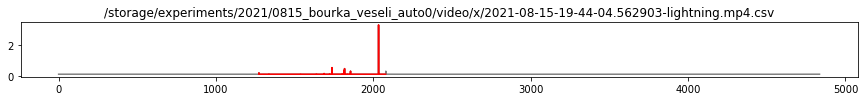

Night thunderstorm


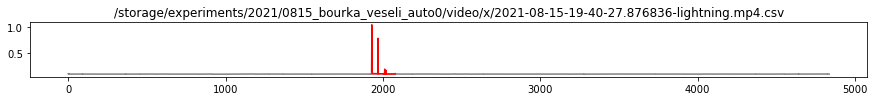

Night thunderstorm


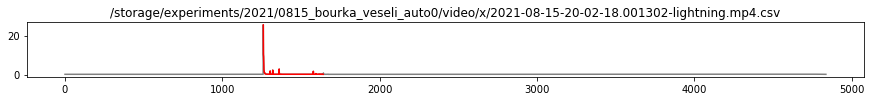

Night thunderstorm


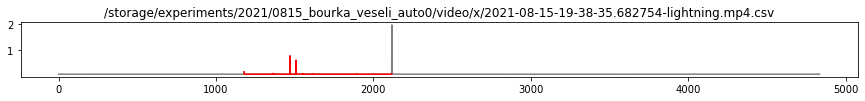

Night thunderstorm


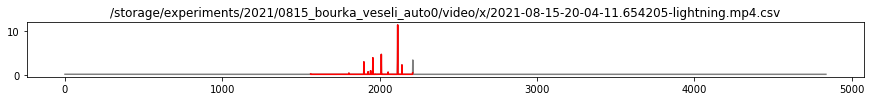

Night thunderstorm


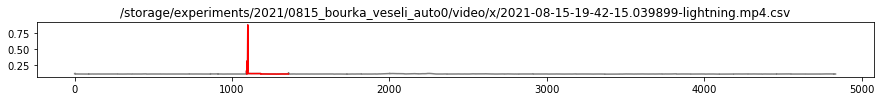

Night thunderstorm


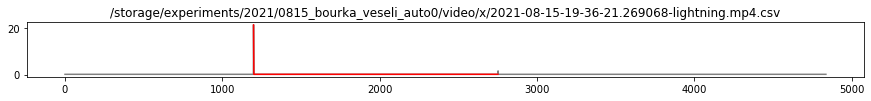

Night thunderstorm


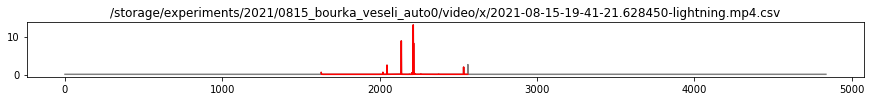

Night thunderstorm


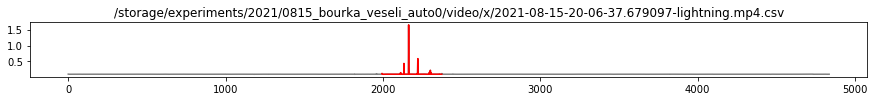

/storage/experiments/2021/0816_bourka_sobeslav 5


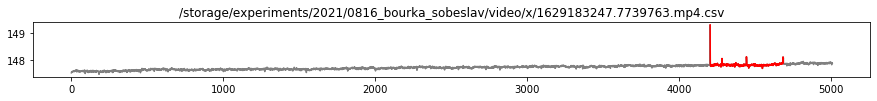

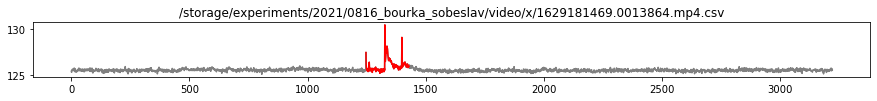

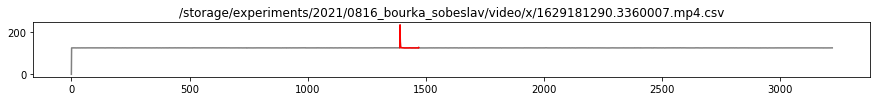

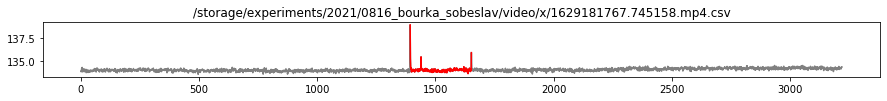

/storage/experiments/2021/0822_bourka_sobeslav_auto0 5


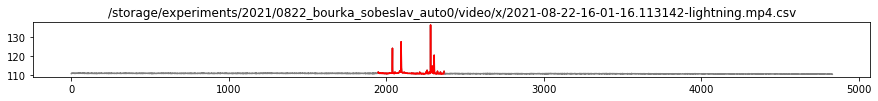

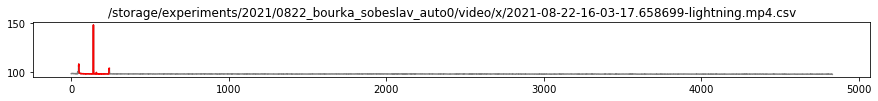

,name,width,height,frames,event_end,event_frames,event_length,event_start
0,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14549,10181.0,115.0,0.064970,10066.0
1,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9520.0,590.0,0.333323,8930.0
2,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9730.0,2.0,0.001130,9728.0
3,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8611,4149.0,1073.0,0.373619,3076.0
4,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8612,2130.0,256.0,0.089139,1874.0
...,...,...,...,...,...,...,...,...
109,/storage/experiments/2021/0816_bourka_sobeslav...,0,0,0,1430.0,183.0,0.113497,1247.0
110,/storage/experiments/2021/0816_bourka_sobeslav...,0,0,0,1471.0,81.0,0.050236,1390.0
111,/storage/experiments/2021/0816_bourka_sobeslav...,0,0,0,1653.0,260.0,0.161252,1393.0
112,/storage/experiments/2021/0822_bourka_sobeslav...,0,0,0,2368.0,420.0,0.260484,1948.0


In [113]:
'''
d = [{'dir':"/storage/experiments/2021/0605_bourka_radosovice",'threshold':5},\
{'dir':"/storage/experiments/2021/0711_bourka_stiavnica",'threshold':5}
#"/storage/experiments/2021/0713_bourka_exit29_D8",\
#"/storage/experiments/2021/0609_bourka_sobeslav"]
#"/storage/experiments/2021/0713_bourka_exit29_D8",\ # stroboskopicka bourka, nelze rozlisit jednotlive blesky
    ]
'''
d = [\
{'dir':"/storage/experiments/2021/0605_bourka_radosovice",'threshold':5},\
{'dir':"/storage/experiments/2021/0609_bourka_sobeslav",'threshold':5},\
{'dir':"/storage/experiments/2021/0711_bourka_stiavnica",'threshold':5},\
{'dir':"/storage/experiments/2021/0714_bourka_martin",'threshold':5},\
{'dir':"/storage/experiments/2021/0714_bourka_sobeslav",'threshold':5},\
{'dir':"/storage/experiments/2021/0725_bourka_ratmirov",'threshold':5},\
{'dir':"/storage/experiments/2021/0726_bourka_zabori",'threshold':5},\
{'dir':"/storage/experiments/2021/0803_bourka_votice",'threshold':5},\
{'dir':"/storage/experiments/2021/0807_bourka_sobeslav",'threshold':5},\
{'dir':"/storage/experiments/2021/0815_bourka_veseli_auto1",'threshold':5},\
{'dir':"/storage/experiments/2021/0815_bourka_veseli_auto0",'threshold':5},\
{'dir':"/storage/experiments/2021/0816_bourka_sobeslav",'threshold':5},\
{'dir':"/storage/experiments/2021/0822_bourka_sobeslav_auto0",'threshold':5}]
#'''

files = pd.DataFrame( columns=['name', 'width', 'height', 'frames'])

window_size = 100
#threshold = 5

for directory in d:
    print(directory['dir'],directory['threshold'])

    for f in glob.iglob(directory['dir'] + "/video/x/*.csv"): # generator, search immediate subdirectories 
        s = f.split('/')
        st = s[len(s)-1]
        ss = f.split('.')
        sss= (ss[0]+'.'+ss[1]).split('/x')
        ff = sss[0]+sss[1]
        
        threshold = directory['threshold'] 
        
        # Import light curve
        light_curve = pd.read_csv(f, names = ['frame','illuminance'], header=0)
        #print(len(light_curve))

        vcap = cv2.VideoCapture(ff)
        width  = vcap.get(3)  # float `width`
        height = vcap.get(4)  # float `height`
        video_length = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        signal_samples=light_curve[["illuminance"]].to_numpy()
        if len(signal_samples) > 0:
            start_sample = signal_samples[:window_size]
            start_noise_std = np.nanstd(np.where(np.isclose(start_sample,0), np.nan, start_sample))
            start_noise_mean = np.nanmean(np.where(np.isclose(start_sample,0), np.nan, start_sample))
            
            end_sample = signal_samples[-window_size:]
            end_noise_std = np.nanstd(np.where(np.isclose(end_sample,0), np.nan, end_sample))
            end_noise_mean = np.nanmean(np.where(np.isclose(end_sample,0), np.nan, end_sample))
            #!!!print(start_noise_std, start_noise_mean, end_noise_std,end_noise_mean)
            if (start_noise_mean < 50 or end_noise_mean < 50): #Detect night lighting
                threshold = threshold *4
                print("Night thunderstorm")


            for sample_num in range(0,len(signal_samples)):
                signal_mean =((end_noise_mean-start_noise_mean)/len(signal_samples))*sample_num + start_noise_mean
                z_score = (signal_samples[sample_num] - signal_mean) / start_noise_std
                if z_score > threshold:
                    event_start = sample_num
                    break

            for sample_num in reversed(range(0,len(signal_samples))):
                signal_mean =((end_noise_mean-start_noise_mean)/len(signal_samples))*sample_num + start_noise_mean
                z_score = (signal_samples[sample_num] - signal_mean) / end_noise_std
                if z_score > threshold:
                    event_end = sample_num
                    break
                    
            if (width == 1024): 
                frame_duration = 1/1770.0525
            if (width == 800): 
                frame_duration = 1/2871.9127
            if (width == 928): 
                frame_duration = 1/1612.3831
            #print(width)
            event_frames = event_end - event_start
            event_length = event_frames * frame_duration
            try:
                plt.figure(figsize=(15,1))
                #plt.tight_layout()
                plt.plot(signal_samples,c='gray')
                plt.plot(range(event_start,event_end), signal_samples[event_start:event_end],c='red')
                plt.title(f)
                plt.show()
            except:
                pass

        else:
            event_start = float("NaN")
            event_end = float("NaN")
        
        #print(f, ',', int(width), ',', int(height), ',', video_length)
        files = files.append({'name':f, 'width':int(width), 'height':int(height), 'frames':video_length, 'event_start':event_start, 'event_end':event_end, 'event_frames':event_frames, 'event_length':event_length}, ignore_index=True)
        vcap.release()
files

Text(0, 0.5, 'Events [-]')

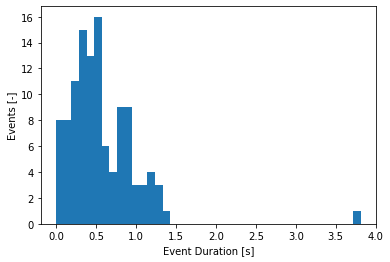

In [114]:
plt.hist(files['event_length'], bins=40)
plt.xlabel('Event Duration [s]')
plt.ylabel('Events [-]')

In [115]:
'''
d = ["/storage/experiments/2021/0605_bourka_radosovice",\
"/storage/experiments/2021/0711_bourka_stiavnica",\
"/storage/experiments/2021/0713_bourka_exit29_D8",\
"/storage/experiments/2021/0609_bourka_sobeslav"]
#"/storage/experiments/2021/0713_bourka_exit29_D8",\ # stroboskopicka bourka, nelze rozlisit jednotlive blesky

'''
d = ["/storage/experiments/2021/0605_bourka_radosovice",\
"/storage/experiments/2021/0609_bourka_sobeslav",\
"/storage/experiments/2021/0711_bourka_stiavnica",\
"/storage/experiments/2021/0714_bourka_martin",\
"/storage/experiments/2021/0714_bourka_sobeslav",\
"/storage/experiments/2021/0725_bourka_ratmirov",\
"/storage/experiments/2021/0726_bourka_zabori",\
"/storage/experiments/2021/0803_bourka_votice",\
"/storage/experiments/2021/0807_bourka_sobeslav",\
"/storage/experiments/2021/0815_bourka_veseli_auto1",\
"/storage/experiments/2021/0815_bourka_veseli_auto0",\
"/storage/experiments/2021/0816_bourka_sobeslav",\
"/storage/experiments/2021/0822_bourka_sobeslav_auto0"]
#'''

files = pd.DataFrame( columns=['name', 'width', 'height', 'frames'])

window_size = 100
threshold = 5

for directory in d:
    print(directory)

    for f in glob.iglob(directory + "/video/*.mp4"): # generator, search immediate subdirectories 
        s = f.split('/')
        st = s[len(s)-1]
        
        # Import light curve
        light_curve = pd.read_csv(f+'.csv', names = ['frame','illuminance'], header=0)
        #print(len(light_curve))

        vcap = cv2.VideoCapture(f)
        width  = vcap.get(3)  # float `width`
        height = vcap.get(4)  # float `height`
        video_length = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        signal_samples=light_curve[["illuminance"]].to_numpy()
        if len(signal_samples) > 0:
            start_sample = signal_samples[:window_size]
            start_noise_std = np.nanstd(np.where(np.isclose(start_sample,0), np.nan, start_sample))
            start_noise_mean = np.nanmean(np.where(np.isclose(start_sample,0), np.nan, start_sample))
            
            end_sample = signal_samples[-window_size:]
            end_noise_std = np.nanstd(np.where(np.isclose(end_sample,0), np.nan, end_sample))
            end_noise_mean = np.nanmean(np.where(np.isclose(end_sample,0), np.nan, end_sample))
            #print(start_noise_std, start_noise_mean, end_noise_std,end_noise_mean)


            for sample_num in range(0,len(signal_samples)):
                signal_mean =((end_noise_mean-start_noise_mean)/len(signal_samples))*sample_num + start_noise_mean
                z_score = (signal_samples[sample_num] - signal_mean) / start_noise_std
                if z_score > threshold:
                    event_start = sample_num
                    break

            for sample_num in reversed(range(0,len(signal_samples))):
                signal_mean =((end_noise_mean-start_noise_mean)/len(signal_samples))*sample_num + start_noise_mean
                z_score = (signal_samples[sample_num] - signal_mean) / end_noise_std
                if z_score > threshold:
                    event_end = sample_num
                    break
            '''
            try:
                plt.figure(figsize=(15,1))
                plt.tight_layout()
                plt.plot(signal_samples,c='gray')
                plt.plot(range(event_start,event_end), signal_samples[event_start:event_end],c='red')
                plt.show()
            except:
                pass
            '''

        else:
            event_start = float("NaN")
            event_end = float("NaN")
        
        #print(f, ',', int(width), ',', int(height), ',', video_length)
        files = files.append({'name':f, 'width':int(width), 'height':int(height), 'frames':video_length, 'event_start':event_start, 'event_end':event_end}, ignore_index=True)
        vcap.release()
files

/storage/experiments/2021/0605_bourka_radosovice
/storage/experiments/2021/0609_bourka_sobeslav
/storage/experiments/2021/0711_bourka_stiavnica
/storage/experiments/2021/0714_bourka_martin
/storage/experiments/2021/0714_bourka_sobeslav
/storage/experiments/2021/0725_bourka_ratmirov
/storage/experiments/2021/0726_bourka_zabori
/storage/experiments/2021/0803_bourka_votice
/storage/experiments/2021/0807_bourka_sobeslav
/storage/experiments/2021/0815_bourka_veseli_auto1
/storage/experiments/2021/0815_bourka_veseli_auto0
/storage/experiments/2021/0816_bourka_sobeslav
/storage/experiments/2021/0822_bourka_sobeslav_auto0


,name,width,height,frames,event_end,event_start
0,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9732.0,9495.0
1,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9520.0,8930.0
2,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14549,11421.0,1055.0
3,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8612,4516.0,3898.0
4,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8611,4149.0,3076.0
...,...,...,...,...,...,...
191,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,1649.0,485.0
192,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4833,1683.0,462.0
193,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,1683.0,462.0
194,/storage/experiments/2021/0822_bourka_sobeslav...,0,0,0,NaN,NaN


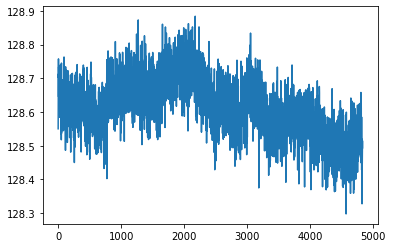

In [106]:
plt.plot(light_curve['frame'],light_curve['illuminance'])

In [107]:
light_curve

,frame,illuminance
0,0,128.550090
1,1,128.662144
2,2,128.653799
3,3,128.712568
4,4,128.702863
...,...,...
4828,4828,128.450104
4829,4829,128.477717
4830,4830,128.483539
4831,4831,128.514541


In [108]:
files

,name,width,height,frames,event_end,event_start
0,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9732.0,9495.0
1,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14550,9520.0,8930.0
2,/storage/experiments/2021/0605_bourka_radosovi...,1024,768,14549,11421.0,1055.0
3,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8612,4516.0,3898.0
4,/storage/experiments/2021/0609_bourka_sobeslav...,800,600,8611,4149.0,3076.0
...,...,...,...,...,...,...
191,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,1649.0,485.0
192,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4833,1683.0,462.0
193,/storage/experiments/2021/0822_bourka_sobeslav...,928,928,4832,1683.0,462.0
194,/storage/experiments/2021/0822_bourka_sobeslav...,0,0,0,NaN,NaN
